<a href="https://colab.research.google.com/github/matheusro/Uniritter-topicos2-NLP/blob/master/Trabalho_Topicos_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático - Processamento de Linguagem Natural
Disciplina: Tópicos II / Professor: William Becker

### Alunos:
Gustavo da Costa Oliveira / Vinícius Valim de Melo / Cláudia Duarte Rodrigues de Oliveira / Matheus Reck de Oliveira

Fonte do Dataset: https://www.kaggle.com/cursostic/avaliao-atendimento#all.csv

Os dados analisados contêm **avaliações de atendimento de equipe de Suporte de TI**.

In [0]:
import numpy as np
import pandas as pd
dataset = pd.read_excel("all.xlsx")

In [2]:
print(dataset)

                                                  coment manifest_atendimento
0                              Nunca abri esse incidente               neutro
1      Profissionais educados, atenciosos e o mais im...               elogio
2      Não tenho condições de responder a esta pesqui...           reclamação
3      Chamado não foi resolvido. Apesar de explicado...           reclamação
4      O chamado foi encerrado como concluído. Porém,...           reclamação
...                                                  ...                  ...
42309  O problema não foi resolvido, porém foi fornec...               neutro
42310                            Excelente atendimento!!               elogio
42311                              Atendimento perfeito.               elogio
42312  Não foi resolvido por motivos externos, servid...               neutro
42313                   Serviço com atendimento perfeito               elogio

[42314 rows x 2 columns]


Ao descrever o dataset abaixo, percebe-se que existem algumas avaliações de atendimento onde os usuários não fizeram nenhum comentário **(8 casos)**.

Coinscidentemente, alguns usuários incluiram exatamente os mesmos comentários na avaliação. No entanto, ainda temos muitos comentários exclusivos, **totalizando 31253**.

O comentário mais reincidente foi o elogio de **"Excelente atendimento."**, sendo apresentado **634 vezes**.

In [3]:
print(dataset.describe()) 

                        coment manifest_atendimento
count                    42306                42314
unique                   31253                    3
top     Excelente atendimento.               elogio
freq                       634                27630


Cono primeiro ajuste do dataset, removemos os registros que não tiveram nenhum comentário.

In [0]:
# remove os comentarios nulos
dataset = dataset[dataset["coment"].isnull() == False]

In [5]:
print(dataset.describe()) 

                        coment manifest_atendimento
count                    42306                42306
unique                   31253                    3
top     Excelente atendimento.               elogio
freq                       634                27630


Analisando as classes originais do dataset, temos a seguinte distribuição:

In [6]:
print(dataset['manifest_atendimento'].value_counts())

elogio        27630
neutro         8174
reclamação     6502
Name: manifest_atendimento, dtype: int64


Para simplificar o modelo, vamos trabalho somente com duas categorias (elogio e reclamação). Neste caso, iremos considerar que todas avaliações neutras também são reclamação.

In [0]:
# considera todas avaliações neutras como reclamação para equilibrar a amostragem entre 'elogio' X 'reclamação'
dataset.loc[dataset.manifest_atendimento == 'neutro', 'manifest_atendimento'] = 'reclamação'

In [8]:
print(dataset['manifest_atendimento'].value_counts())

elogio        27630
reclamação    14676
Name: manifest_atendimento, dtype: int64


Abaixo, nós convertemos os tipos de dado dos campos 'coment' para 'str' e 'manifest_atendimento' para 'category'.

In [0]:
# converte os comentarios para string
dataset['coment'] = dataset.coment.astype(str)
# converte os manifestos para categorico
dataset['manifest_atendimento'] = dataset.manifest_atendimento.astype('category')

A seguir, iniciamos alguns tratamentos específicos do campo 'coment', como por exemplo a tokenização e a limpeza de caracteres especiais.

In [10]:
import nltk
import unicodedata
import re
# importa tokenizadores e stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Tokenização** de cada um dos comentários:

In [11]:
# preparacao dos dados
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# tokenizando as sentencas
dataset["coment"] = [word_tokenize(word) for word in dataset["coment"]]
print(dataset)

                                                  coment manifest_atendimento
0                         [Nunca, abri, esse, incidente]           reclamação
1      [Profissionais, educados, ,, atenciosos, e, o,...               elogio
2      [Não, tenho, condições, de, responder, a, esta...           reclamação
3      [Chamado, não, foi, resolvido, ., Apesar, de, ...           reclamação
4      [O, chamado, foi, encerrado, como, concluído, ...           reclamação
...                                                  ...                  ...
42309  [O, problema, não, foi, resolvido, ,, porém, f...           reclamação
42310                     [Excelente, atendimento, !, !]               elogio
42311                         [Atendimento, perfeito, .]               elogio
42312  [Não, foi, resolvido, por, motivos, externos, ...           reclamação
42313              [Serviço, com, atendimento, perfeito]               elogio

[42306 rows x 2 columns]


Aplicamos em seguida a remoção de **stopwords** da língua portuguesa:

In [0]:
# remocao de stopwords
dataset["coment"] = dataset["coment"].apply(lambda x: [item for item in x if item not in stopwords.words("portuguese")])

In [13]:
print(dataset.head())

                                              coment manifest_atendimento
0                           [Nunca, abri, incidente]           reclamação
1  [Profissionais, educados, ,, atenciosos, impor...               elogio
2  [Não, condições, responder, pesquisa, ., Onde,...           reclamação
3  [Chamado, resolvido, ., Apesar, explicado, nec...           reclamação
4  [O, chamado, encerrado, concluído, ., Porém, ,...           reclamação


In [14]:
dataset["coment"] = [' '.join(word) for word in dataset["coment"]]
print(dataset.head())

                                              coment manifest_atendimento
0                               Nunca abri incidente           reclamação
1  Profissionais educados , atenciosos importante...               elogio
2  Não condições responder pesquisa . Onde parece...           reclamação
3  Chamado resolvido . Apesar explicado necessida...           reclamação
4  O chamado encerrado concluído . Porém , ramal ...           reclamação


A função abaixo **remove todos os caracteres especiais** de cada uma das avaliações:

In [0]:
def removerAcentosECaracteresEspeciais(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

In [0]:
# realiza a limpeza nos dados (lowecase e remocao de caracteres)
remove_caracteres = re.compile('[^0-9a-z #+_]')
replace_espaco = re.compile('[/(){}\[\]\|@,;]')

def pre_processamento(text):
    text = text.lower()
    text = remove_caracteres.sub('', text)
    text = replace_espaco.sub(' ', text)
    return text

dataset['coment'] = dataset['coment'].apply(pre_processamento)
dataset['coment'] = dataset['coment'].apply(removerAcentosECaracteresEspeciais)

In [17]:
print(dataset.head())

                                              coment manifest_atendimento
0                               nunca abri incidente           reclamação
1  profissionais educados  atenciosos importante ...               elogio
2  no condies responder pesquisa  onde parecer pr...           reclamação
3  chamado resolvido  apesar explicado necessidad...           reclamação
4  o chamado encerrado concludo  porm  ramal cont...           reclamação


A seguir é apresentado um ranking das palavras mais frequentes nos comentários, onde percebemos que a mais mencionada foi **'atendimento'**, sendo exibida **17524 vezes**.

In [0]:
counts = dict()
for i in range(0, len(dataset)):
    texto = dataset.iloc[i]['coment']
    words = texto.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

In [19]:
sorted(counts.items(), key=lambda x: x[1], reverse=True)

[('atendimento', 17521),
 ('excelente', 6904),
 ('o', 5845),
 ('problema', 5797),
 ('atendente', 3989),
 ('muito', 3013),
 ('rpido', 2920),
 ('chamado', 2823),
 ('parabns', 2678),
 ('bom', 2657),
 ('resolvido', 2641),
 ('timo', 2623),
 ('a', 2566),
 ('eficiente', 2273),
 ('no', 2260),
 ('obrigado', 1849),
 ('atendido', 1740),
 ('solicitao', 1655),
 ('soluo', 1589),
 ('bem', 1561),
 ('tcnico', 1543),
 ('servio', 1538),
 ('ser', 1420),
 ('tic', 1360),
 ('equipe', 1319),
 ('resolver', 1215),
 ('trabalho', 1177),
 ('foi', 1126),
 ('pois', 1124),
 ('tempo', 1113),
 ('acesso', 1072),
 ('e', 1042),
 ('obrigada', 1025),
 ('profissional', 981),
 ('ainda', 979),
 ('local', 975),
 ('atencioso', 953),
 ('presteza', 927),
 ('fui', 896),
 ('sistema', 879),
 ('sempre', 875),
 ('rapidez', 830),
 ('atendeu', 815),
 ('apoio', 812),
 ('contato', 805),
 ('resolveu', 800),
 ('eficaz', 798),
 ('atendida', 796),
 ('agradeo', 785),
 ('dia', 777),
 ('eficincia', 772),
 ('nota', 770),
 ('ter', 762),
 ('satisfei

Para entender melhor a distribuição das palavras frequentes, geramos duas visões de nuvem de palavras, sendo a primeira dos 'elogios' e a segunda das 'reclamações'.

In [0]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [0]:
def nuvem_palavras(dataset):

    comment_words = ''  
    stopwords = set(STOPWORDS)

    for i in range(0, len(dataset)):
        val = dataset.iloc[i]['coment']
        tokens = val.split() 
      
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
              
        for words in tokens: 
            comment_words = comment_words + words + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
      
    plt.show() 

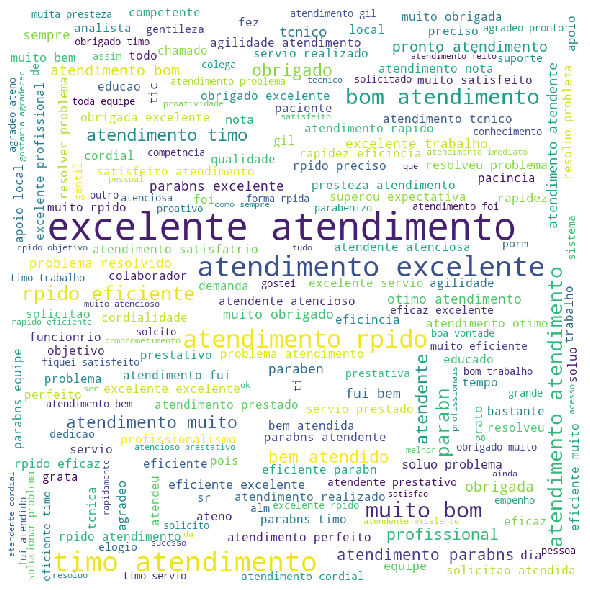

In [22]:
elogios = dataset[dataset['manifest_atendimento']=='elogio']
nuvem_palavras(elogios)

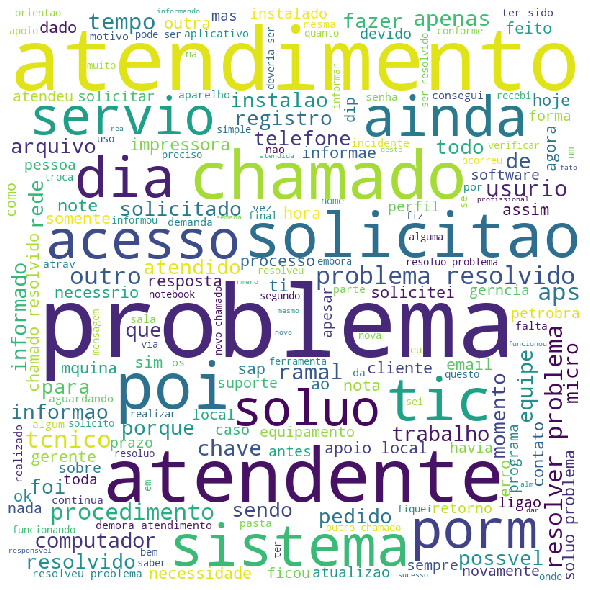

In [23]:
reclamacoes = dataset[dataset['manifest_atendimento']=='reclamação']
nuvem_palavras(reclamacoes)

In [38]:
# Tratar as palavras para obter somente radicais - STEMMING

## NAO ESTÁ FUNCIONANDO!!!!!!!!!!!!!!!!!!!

from nltk.stem import PorterStemmer
ps = PorterStemmer() 
for i in range(0, len(dataset)):
    dataset.coment[i] = ps.stem(dataset.iloc[i]['coment'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
dataset.coment

0                                         nunca abri incid
1        profissionais educados  atenciosos importante ...
2        no condies responder pesquisa  onde parecer pr...
3        chamado resolvido  apesar explicado necessidad...
4        o chamado encerrado concludo  porm  ramal cont...
                               ...                        
32139    perdi diversas customizaes personalizaes  menu...
38916    o atendimento excelente  favor retransmitir ag...
38917    os tcnicos alex  ramon  e a ti de recife foram...
40495            a ti atendeu maneira muita rpida cordial 
41253                               excelente atendimento 
Name: coment, Length: 42314, dtype: object

Após as análises e preparação dos dados, começamos a treinar nossos modelos.

In [0]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset["coment"], 
                                                                    dataset["manifest_atendimento"], 
                                                                    test_size=0.3)

In [0]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(dataset["coment"])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [0]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, y_train)

predictions = Naive.predict(Test_X_Tfidf)

In [79]:
print("Acuracia NB:", accuracy_score(predictions, y_test)*100)

Acuracia NB: 92.71982351087298


In [0]:
# Aplicar o SVM

In [0]:
# INCLUIR UM TESTE DO MODELO 
## Inventar um ELOGIO e um RECLAMAÇÃO